## Importing Libraries

Essential Python libraries such as NumPy, Pandas, and visualization tools are imported.  
Machine learning libraries from `scikit-learn` are used for model training and evaluation.


In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


## Loading the Dataset

The cardiovascular dataset is loaded from a CSV file into a Pandas DataFrame for analysis and preprocessing.


In [2]:
# Load dataset
df = pd.read_csv("Cardiovasculardataset.csv")

# Display first 5 rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


## Dataset Overview

Basic information about the dataset is displayed to understand:
- Number of rows and columns
- Data types of each feature
- Presence of missing values


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817714,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011381,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
X = df.drop("cardio", axis=1)   # Features
y = df["cardio"]                # Target variable

## Splitting the Dataset

The data is split into training and testing sets.
- 80% for training
- 20% for testing  
Stratification is applied to maintain class balance.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Logistic Regression Evaluation

Model performance is evaluated using:
- Accuracy
- Classification report
- Confusion matrix


In [10]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7137142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



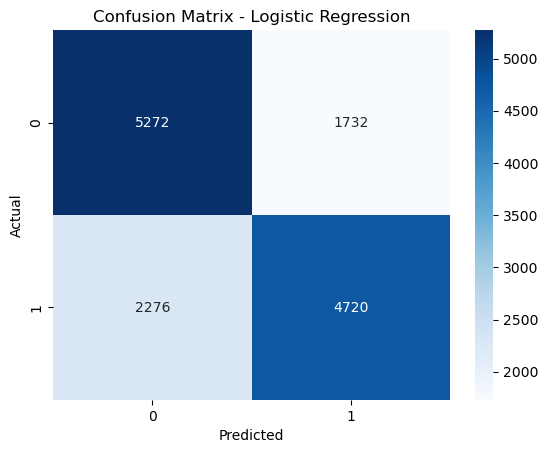

In [11]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


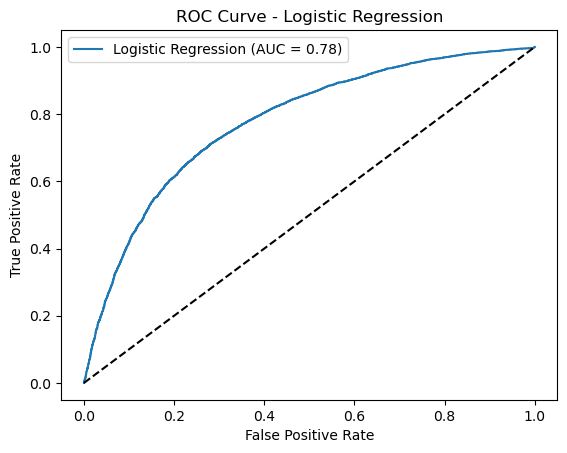

In [12]:
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_lr))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## Random Forest Classifier

A Random Forest model is trained as an ensemble method to improve prediction accuracy and reduce overfitting.


In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Random Forest Evaluation

Model performance is analyzed using:
- Accuracy
- Confusion matrix
- ROC curve and AUC score


In [14]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7222142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      7004
           1       0.73      0.70      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



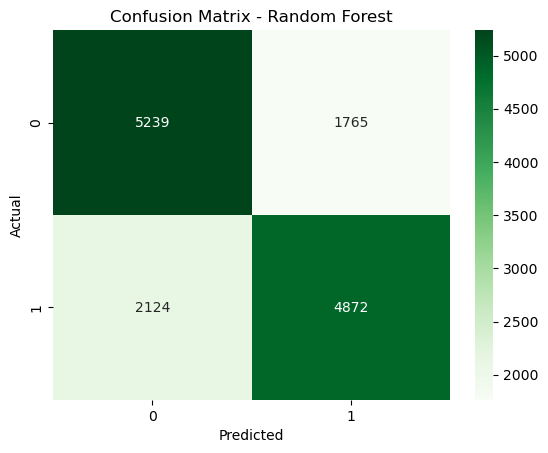

In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


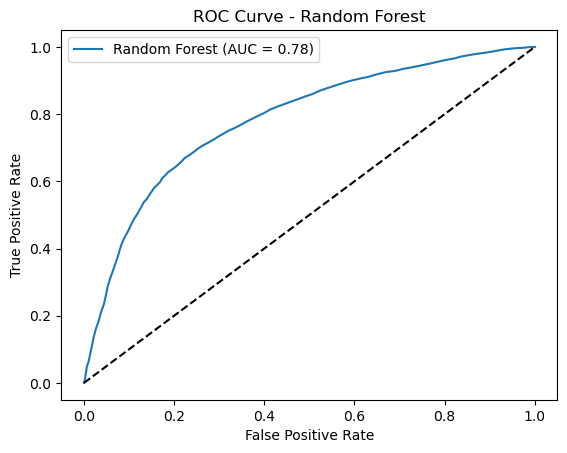

In [16]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_rf))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [17]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_lr,
        roc_auc_rf
    ]
})

results


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.713714,0.778092
1,Random Forest,0.722214,0.782798


In [18]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [19]:
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7275714285714285

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      7004
           1       0.75      0.68      0.71      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



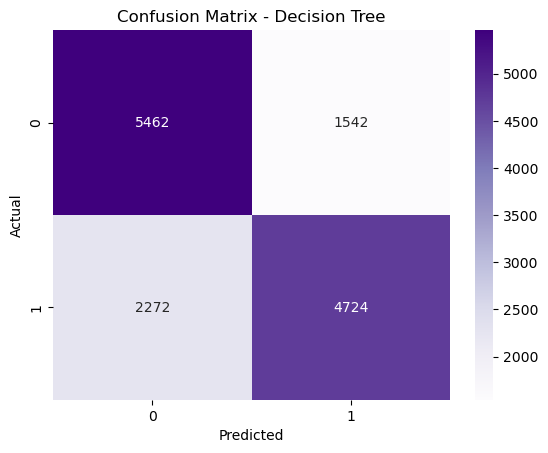

In [20]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


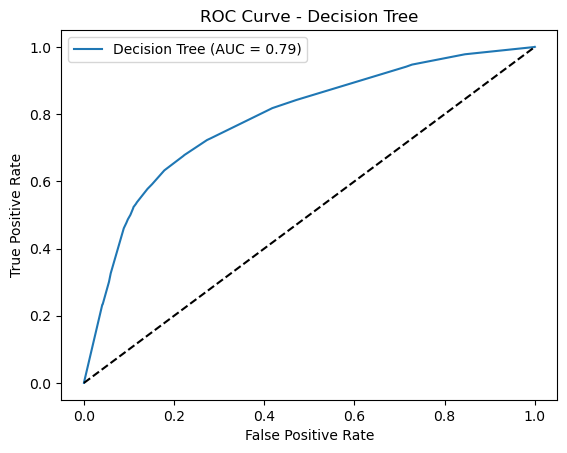

In [21]:
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)

plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc_dt))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


## Model Comparison

The performance of Logistic Regression, Decision Tree, and Random Forest models is compared using accuracy and AUC scores.


In [22]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Decision Tree"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["precision"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["precision"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["precision"]
    ],
    "Recall": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["recall"]
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["f1-score"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["f1-score"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["f1-score"]
    ]
})

comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.713714,0.731556,0.674671,0.701963
1,Random Forest,0.722214,0.734067,0.696398,0.714736
2,Decision Tree,0.727571,0.753910,0.675243,0.712411


## Prediction Results

Prediction outputs for each model are displayed alongside the actual values to observe correct and incorrect classifications.


In [23]:
# Create prediction dataframe for Logistic Regression
lr_test_results = pd.DataFrame({
    "Actual Output": y_test.values,
    "Predicted Output": y_pred_lr,
    "Prediction Match": y_test.values == y_pred_lr
})

# Display first 20 predictions
lr_test_results.head(20)


,Actual Output,Predicted Output,Prediction Match
0,0,0,True
1,0,0,True
2,0,0,True
3,1,0,False
4,1,0,False
5,0,1,False
6,1,0,False
7,0,0,True
8,0,0,True
9,1,1,True


In [24]:
# Create prediction dataframe for Decision Tree
dt_test_results = pd.DataFrame({
    "Actual Output": y_test.values,
    "Predicted Output": y_pred_dt,
    "Prediction Match": y_test.values == y_pred_dt
})

# Display first 20 predictions
dt_test_results.head(20)


,Actual Output,Predicted Output,Prediction Match
0,0,0,True
1,0,1,False
2,0,0,True
3,1,0,False
4,1,0,False
5,0,1,False
6,1,0,False
7,0,0,True
8,0,0,True
9,1,1,True


In [26]:
# Create prediction dataframe for Random Forest
rf_test_results = pd.DataFrame({
    "Actual Output": y_test.values,
    "Predicted Output": y_pred_rf,
    "Prediction Match": y_test.values == y_pred_rf
})

# Display first 20 predictions
rf_test_results.head(20)


,Actual Output,Predicted Output,Prediction Match
0,0,0,True
1,0,1,False
2,0,0,True
3,1,0,False
4,1,0,False
5,0,0,True
6,1,0,False
7,0,0,True
8,0,0,True
9,1,1,True
